# Titanic Survival Prediction Model
#### In this project I'll try to make best model for Survival Prediction. I'll experiment with various different ways of Preprocessing, Exploratory Data Analysis, Model Training and Hyperparameter tuning.
##### I'll perform below steps:-
1. Data cleaning / Handling missing values
2. Data Visualization
3. Data Preprocessing
4. Feature scaling with standardization
5. Build model using various Machine Learning algorithms
6. Campare the accuracy to choose the suitable model
7. Hyperparameter tuning & do predictions
8. Create a pickle file & submit the prediction result

#### Problem Defination:- Knowing from a training dataset of samples listing passangers who survived or not survived the titanic disaster. Can our model determine based on a given test dataset not containing the survival information, if these passangers in the test dataset survived or not.

In [1]:
# Importing Libraries
# Data analysis
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquire Data
##### The Python Pandas library helps us to work with our datasets. We start by acquiring the training and tesing datasets into Pandas DataFrames.

In [2]:
# Load Train and Test datasets and create copy
train_data = pd.read_csv("titanic_train_data.csv")
test_data = pd.read_csv("titanic_test_data.csv")
train = train_data.copy()
test = test_data.copy()

##### To know the information of the dataset, we use info() function. It gives information about variables, number of non null count, datatype of each column and memory usage.

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


##### To know the statistical details of the dataset, we use describe() function

In [5]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


##### To display the row details of the dataframe, we use head() method. By defult it displays first 5 row details as an output

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Step 1=> Data cleaning / Handling missing values
### Step 2=> Data Visualization
### Step 3=> Data Preprocessing
#### We will perform above mentioned three steps parallelly. we'll visualize the data using different graphs and also perform preprocessing on the training and test data simultaneously. 

In [9]:
# Lets remove the feature 'PassengerId' which is not significant in the datasets
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [10]:
#Lets check the null values in the training dataset.
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#check the null values in the testing dataset.
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

##### This is the list of our missing values from the training and test set. Lets now look at all the features one by one in our training and testing datasets. 

### 1. Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

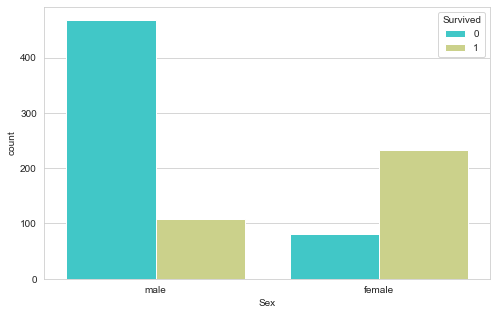

In [13]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x= 'Sex', hue='Survived', data=train_data, palette='rainbow')

#### 'Sex' is a categorical data (male or female). Now, we'll convert this categorical data into numberical data. We'll use get_dummies() function to convert 'Sex' column and make two dummy columns of female and male

In [14]:
sex1 = pd.get_dummies(train['Sex'])
sex2 = pd.get_dummies(test['Sex'])

train.drop(['Sex'], axis=1, inplace=True)
test.drop(['Sex'], axis=1, inplace=True)

train = pd.concat([train,sex1], axis=1)
test = pd.concat([test,sex2], axis=1)

#### Lets now remove one column as we get all the necessary information from other one

In [15]:
train.drop(['female'], axis=1, inplace=True)
test.drop(['female'], axis=1, inplace=True)

In [16]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0


### 2. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

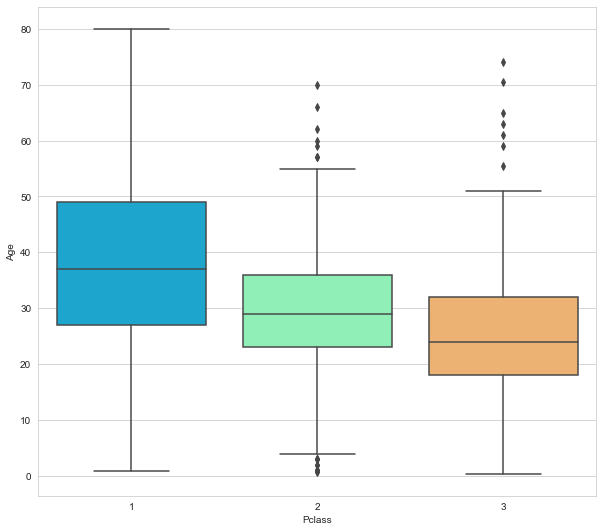

In [18]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

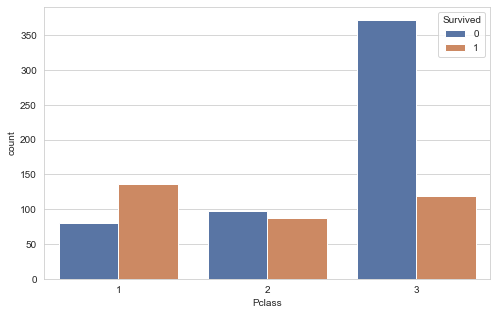

In [19]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='deep')

#### Here, from above plot we can see that people from higher class (1 being highest) had better chance of survival

### 3. Age

Text(0, 0.5, 'Density')

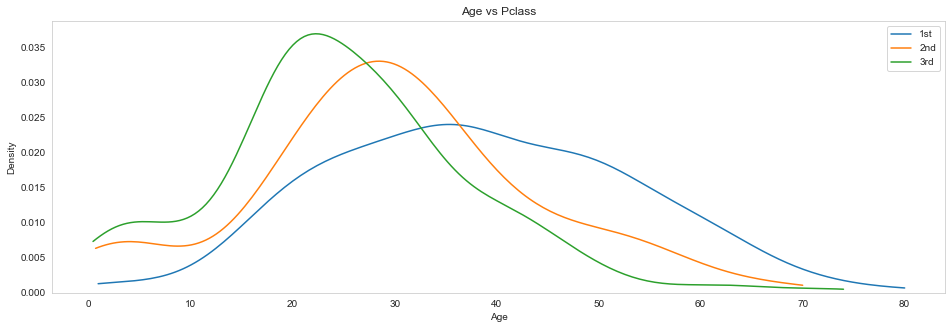

In [20]:
plt.figure(figsize=(16,5))
for x in [1,2,3]: #for 3 classes
    sns.kdeplot(data=train_data.Age[train_data.Pclass==x], cut=0, clip=(0,200)).grid(False)
plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")

This graph shows the density of people who belong to the 3 classes along w.r.t. age.

#### The missing values have to be filled with median value

In [21]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Out of these values '50%' gives median value

In [23]:
train['Age'].fillna(train['Age'].describe().loc[['50%']][0], inplace=True)
test['Age'].fillna(test['Age'].describe().loc[['50%']][0], inplace=True)

### 4. Fare
#### "Fare" column tells us about the amount of money paid by the passengers.

C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare distribution for all the passengers')

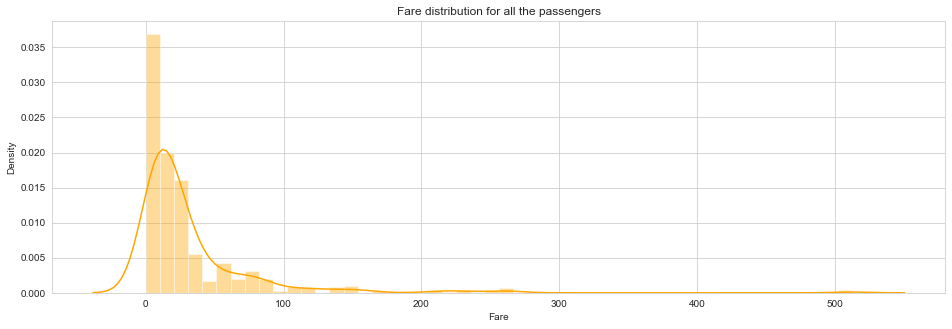

In [27]:
f, axes = plt.subplots(1, 1, figsize = (16,5))
sns.distplot(train['Fare'], color='orange', ax=axes)
plt.title("Fare distribution for all the passengers")

#### Lets now separate the passengers who did survive and not survive based on 'Fare'

In [28]:
Fare_0 = []
Fare_1 = []
for i in range(0,891):
    if train_data['Survived'][i]==0:
        Fare_0.append(train['Fare'][i])
    else:
        Fare_1.append(train['Fare'][i])

C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Farhana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


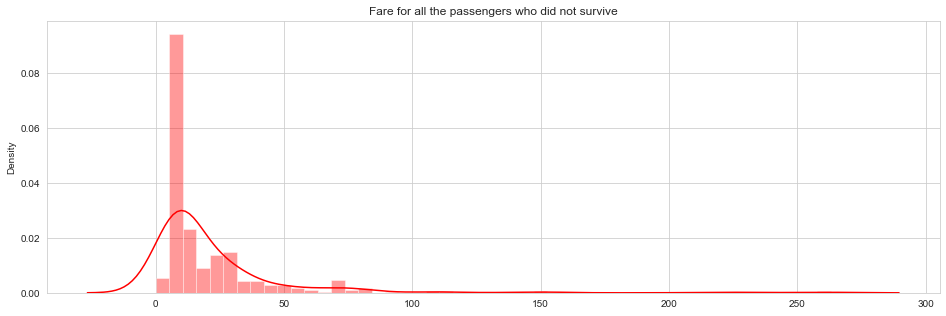

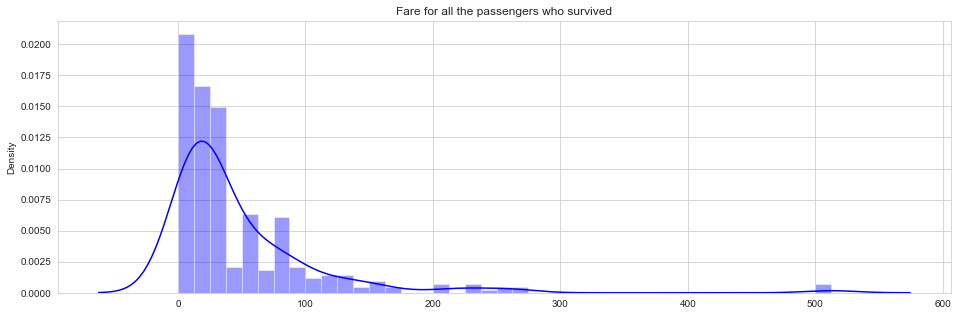

In [29]:
f,axes = plt.subplots(1, 1, figsize = (16,5))
sns.distplot(Fare_0, color='red', ax=axes)
plt.title("Fare for all the passengers who did not survive")

f,axes = plt.subplots(1, 1, figsize = (16,5))
sns.distplot(Fare_1, color='blue', ax=axes)
plt.title("Fare for all the passengers who survived")

plt.show()

#### Here we can see that passengers had a greater probability of surviving if they had payed more.

####  'Fare' column in test dataset has one missing value. lets fill it with median value

In [31]:
test['Fare'].fillna(test['Fare'].describe().loc[['50%']][0], inplace=True)

### 5. Embarked
#### This column holds the embarkation records for all the passengers. They stand for:
    S - Southampton
    C - Cherbourg
    Q - Queenstown

<AxesSubplot:xlabel='Embarked', ylabel='count'>

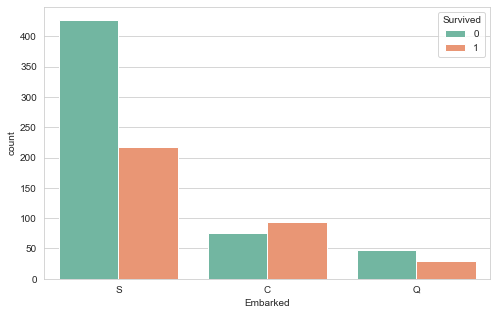

In [32]:
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='Set2')

In [33]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S',inplace=True)

#### Filling the missing values with 'S' as it is the most frequently occuring value

#### Lets now convert the categorical data into numerical data using get_dummies() function

In [34]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'],axis=1, inplace=True)

train = pd.concat([train, embark1], axis=1)
test = pd.concat([test,embark2], axis=1)

### 6.SibSp and Parch
##### SibSp tells us about the passengers' siblings and spouse.
##### Parch tells us about the passengers' parents and children

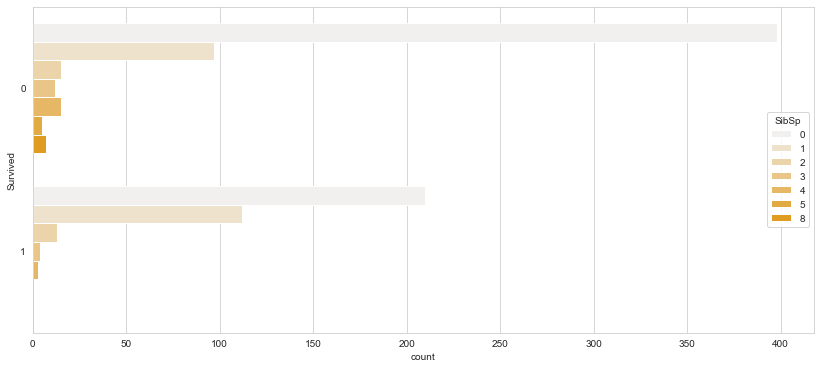

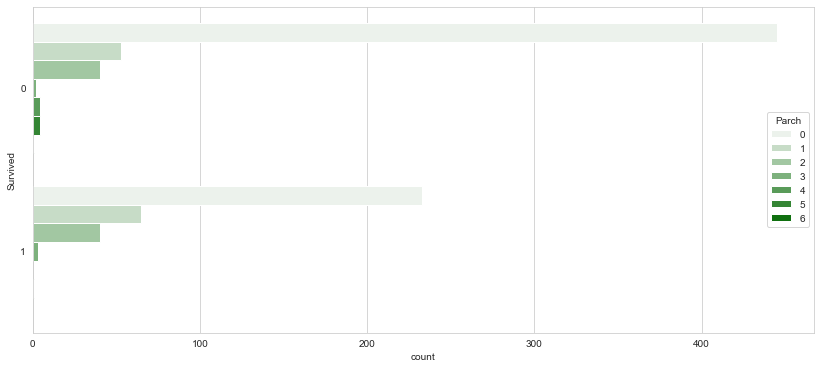

In [35]:
plt.figure(figsize = (14,6))
sns.countplot(y='Survived', hue='SibSp', data=train, color='Orange')

plt.figure(figsize = (14,6))
sns.countplot(y='Survived', hue='Parch', data=train, color="Green")

plt.show()

In [36]:
def fam(x):
    if (x['SibSp']+x['Parch'])>0:
        return 1
    else:
        return 0
    
train['Family'] = train.apply(fam, axis=1)
test['Family'] = test.apply(fam, axis=1)

In [38]:
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

##### The SibSp and Parch column were not giving any valuable information/trend that could have helped in getting accurate prediction, hence they were combined. 
##### Lets now determine whether the passenger has a family or not.

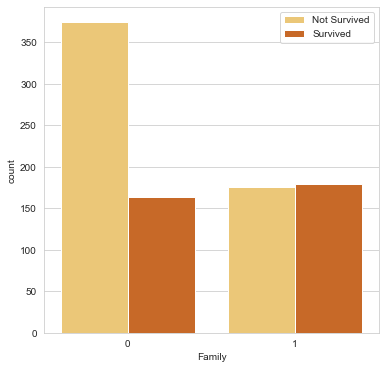

In [39]:
plt.figure(figsize = (6,6))
sns.set_style('whitegrid')
sns.countplot(x='Family', hue='Survived', data=train, palette="YlOrBr")
plt.legend(("Not Survived","Survived"))

##### Here we can see that a passenger having no family had a lesser chance of survival.

### 7. Cabin
#### "Cabin" is an interesting column telling us about the cabin which was occupied by the passenger.

In [ ]:
train['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'])
test['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for in test['Cabin'])

##### Here we are taking the prefix values of the cabin number. The missing values will be replaced with 'X'.

In [ ]:
plt.figure(figsize= (8,5))
sns.catplot(y='Survived', x='Cabin', data=train, kind='bar', order=['A','B','C','D','E','F','G','X'])

##### Lets now map this alphabetical value with a numerical value

In [ ]:
train['Cabin'] = train['Cabin'].map('X'=0,'A'=1,'B'=2,'C'=3,'D'=4,'E'=5,'F'=6,'G'=7,'T'=0)
train['Cabin'] = train['Cabin'].astype(int)

test['Cabin'] = test['Cabin'].map('X'=0,'A'=1,'B'=2,'C'=3,'D'=4,'E'=5,'F'=6,'G'=7,'T'=0)
test['Cabin'] = test['Cabin'].astype(int)

##### Any which ways this column is not much useful, because in an actual sinking emergency all the passengers irrespective of their cabin would gather around at the port side and starboard side of the ship for evacuation. Similar thing must have happened with Titanic. Therefore it does not matter which cabin you are occupying.
##### Women and children had the first preference, along with them there were people who belonged to the higher class. This data is covered under the "Sex" , "Pclass" and "Age" column.
##### Considering this I droped the "Cabin" column.

### 8. Name and Titles
#### In the dataset, we have 'Name' column mentioning the names of every passenger. These names have titles along with them which will be usefull
#### We will be splitting title from the name.

In [ ]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
test_title = [i.split(",")[1].split("."),[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)

In [ ]:
train = train.drop(["Name"], axis=1)
test = test.drop(["Name"], axis=1)

In [ ]:
plt.figure(figsize = (14,6))
g = sns.countplot(x="Title", data=train)
g = sns.setp(g.get_xticklabels(), rotation = 45)

##### Here we have our titles mapped with numeric values

In [ ]:
train["Title"] = train["Title"].replace(['Lady','the countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'))
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

### 9. Ticket
##### This column has the ticket number of all the passengers. Here we will be taking the ticket prefix.

In [ ]:
Titcket1 = []
for i in list(train.Ticket):
    if not i.isdigit():
        Ticket1.append(i.replace("."," ").replace("/"," ").strip().split(' ')[0]) #Take prefix
    else
        Ticket1.append("X")
train["Ticket"] = Ticket1

Ticket2 = []
for i in list(test.Ticket):
    if not i.isdigit():
        Ticket2.append(i.replace("."," ").replace("/"," ").strip().split(' ')[0]) #Take prefix
    else
        Ticket2.append("X")
test["Ticket"] = Ticket2

In [ ]:
train["Ticket"].unique()

In [ ]:
test["Ticket"].unique()

#### Here is a tricky part. The training set and test set have a few tickets which are unique to themselves.

In [ ]:
 np.union1d(train["Ticket"], test["Ticket"])

#### These above tickets are common in both the sets.

In [ ]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

#### In order to maintain the same number of columns I had to tamper the test set and had to remove these unique tickets. Same was done with training set.
#### These are the following unique tickets which are dropped.

In [ ]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

In [ ]:
train.drop(['Survived'],axis=1,inplace=True)

In [ ]:
train.head(5)

#### This is our final training set after preprocessing.
#### Note: In the above feature preprocessing, the median values are best suited for missing values in most of the Machine-Learning models.
### Checking for missing values for the new dataframes

In [ ]:
print(train.isnull().sum())
print("Number of columns are :",train.isnull().sum().count())

In [ ]:
print(test.isnull().sum())
print("Number of columns are :",test.isnull().sum().count())

#### We can now proceed further as there are no missing values in the training and test set.
### Step 3=> Feature Scaling with Standardization
#### Applying standarization as part of our data normalization.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train2 = sc.fit_transform(train)
test2 = sc.transform(test)

### Step 5=> Build model using various Machine Learning algorithms
#### In this section we will be training various models using different classifiers. Out of them all, we will be choosing the best classifier to give us the most accurate prediction.

In [ ]:
from pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_score = pd.DataFrame()

classifier = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 'RandonForestClassifier', 
              'AdaBoostClassifier', 'XGBoostClassifier', 'KNeighborsClassifier',
              'GradientBoostingClassifier']

models = [svm.SVC(kernel = 'linear'),
          svm.SVC(kernel = 'rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators = 200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          xgb.XGBClassifier(n_estimators = 100),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state = 0)]

j = 0
for i in models:
    model = i
    cv = KFold(n_splits = 5, random_state = 0, shuffle = True)
    KFold_score[classifiers[j]] = (cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv)
    j = j + 1

### Step 6=> Campare the accuracy to choose the suitable model
#### Using K-Folds Cross validation to evaluate the performance of our models

In [ ]:
mean = pd.DataFrame(KFold_score.mean(), index = classifiers)
KFold_score = pd.concat(KFold_score, mean.T)
KFold_score.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_score.T.sort_values(by['Mean'], ascending = False)

#### Here RandomForestClassifier is giving the highest accuracy.
### Step 7=> Hyperparameter tuning & do predictions